In [0]:
%%file data.txt
date,infected,deaths
21/jan/2020,446,9
22/jan/2020,579,17
23/jan/2020,844,25
24/jan/2020,1312,41
25/jan/2020,2015,56
26/jan/2020,2801,80
27/jan/2020,4579,106
28/jan/2020,6061,132
29/jan/2020,7816,170
30/jan/2020,9821,213
31/jan/2020,11948,258
01/feb/2020,14551,304
02/feb/2020,17387,362
03/feb/2020,20626,426
04/feb/2020,24553,492
05/feb/2020,28276,565
06/feb/2020,31439,638
07/feb/2020,34875,724
08/feb/2020,37552,813
09/feb/2020,40553,910
10/feb/2020,43099,1018
11/feb/2020,44919,1114
12/feb/2020,60327,1369
13/feb/2020,65246,1491
14/feb/2020,67100,1526
15/feb/2020,69197,1669
16/feb/2020,71329,1775
17/feb/2020,73332,1873
18/feb/2020,75184,2009
19/feb/2020,75700,2126
20/feb/2020,76676,2247

Writing data.txt


In [0]:
import pandas as pd
import scipy.optimize
import numpy as np
import seaborn
import datetime
import matplotlib
import matplotlib.pyplot as plt
seaborn.set()
figsize = (8, 6)

In [0]:
data = pd.read_csv('data.txt', 
                   parse_dates=[0], 
                   infer_datetime_format=True)
print(f"Last executed: {datetime.date.today().strftime('%d %b %Y')}, "\
      f"last data point from {max(data['date']).strftime('%d %b %Y')}.")

Last executed: 22 Feb 2020, last data point from 20 Feb 2020.


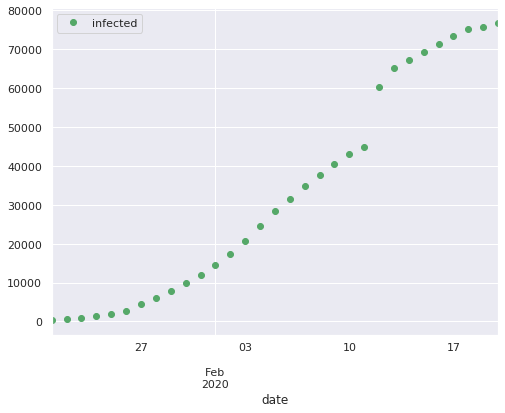

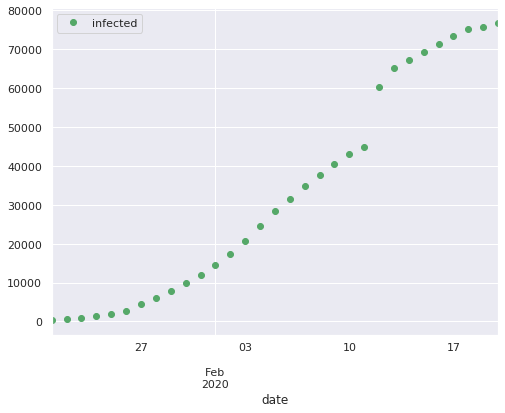

In [0]:
fig, ax = plt.subplots(figsize=figsize)
data.plot('date', 'infected', style='og', ax=ax);
ax.get_figure()

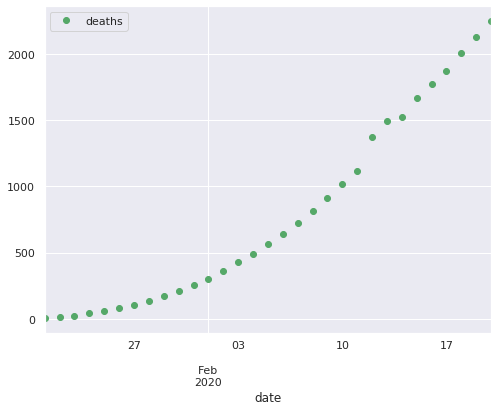

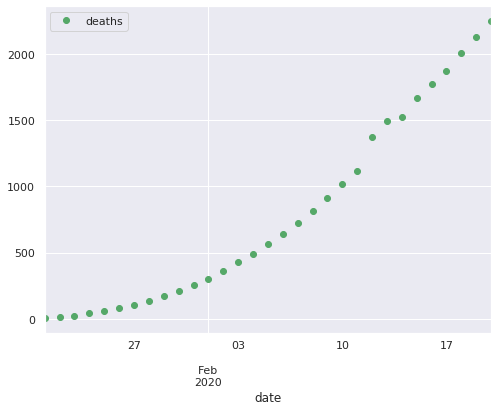

In [0]:
fig, ax = plt.subplots(figsize=figsize)
data.plot('date', 'deaths', style='og', ax=ax)
ax.get_figure()

In [0]:
data['days-td'] = data['date'] - data['date'][0]  # td = TimeDelta
data['days'] = data['days-td'].astype("timedelta64[D]").astype(float)
data['new-infections'] = data['infected'].diff()
data['new-deaths'] = data['deaths'].diff()
# grow factor (see https://www.worldometers.info/coronavirus/coronavirus-cases/#cases-growth-factor)
data['growth-infected'] = data['infected'].pct_change()+1
data['growth-deaths'] = data['deaths'].pct_change()+1
# data.to_html('figures/table-1.html')
data

,date,infected,deaths,days-td,days,new-infections,new-deaths,growth-infected,growth-deaths
0,2020-01-21,446,9,0 days,0.0,NaN,NaN,NaN,NaN
1,2020-01-22,579,17,1 days,1.0,133.0,8.0,1.298206,1.888889
2,2020-01-23,844,25,2 days,2.0,265.0,8.0,1.457686,1.470588
3,2020-01-24,1312,41,3 days,3.0,468.0,16.0,1.554502,1.640000
4,2020-01-25,2015,56,4 days,4.0,703.0,15.0,1.535823,1.365854
5,2020-01-26,2801,80,5 days,5.0,786.0,24.0,1.390074,1.428571
6,2020-01-27,4579,106,6 days,6.0,1778.0,26.0,1.634773,1.325000
7,2020-01-28,6061,132,7 days,7.0,1482.0,26.0,1.323651,1.245283
8,2020-01-29,7816,170,8 days,8.0,1755.0,38.0,1.289556,1.287879
9,2020-01-30,9821,213,9 days,9.0,2005.0,43.0,1.256525,1.252941


Text(0.5, 1.0, 'New deaths per day')

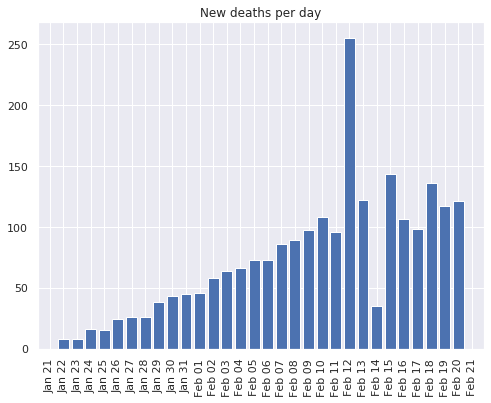

In [0]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(data['date'], data['new-deaths'])
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
ax.set_title("New deaths per day")

Text(0.5, 1.0, 'New infections per day')

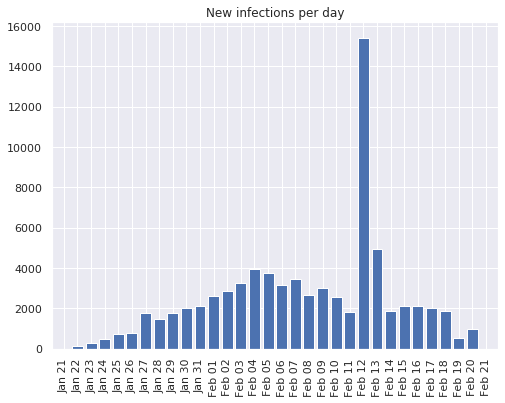

In [0]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(data['date'], data['new-infections'])
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
ax.set_title("New infections per day")

In [0]:
def day_to_date(day):
    
    assert isinstance(day, (int, float)), day
    
    date = pd.datetime(year=2020, month=1, day=21) + pd.Timedelta(day, "D")

    s = date.strftime("%d %b %Y")
    return s

In [0]:
def model(t, c, t0, p, a0):
    return c*(t-t0)**p + a0    

In [0]:
list(data['date'].iloc[23:])

[Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-20 00:00:00')]

In [0]:
if False:
    dates_used = ['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-02-12', '2020-02-13', '2020-02-14',
                 '2020-02-15']
    dates_used_string = str(dates_used)

    data2 = data[data['date'].isin(dates_used)]    
else:
    dates_used_string = 'data from all days from 2020-01-21 to ' + str(max(data['date']))[0:10]
    data2 = data
dates_used_string

'data from all days from 2020-01-21 to 2020-02-20'

In [0]:
days = data['days']
days2 = data2['days']
infections = data2['infected']
param_infections, cov_infections = \
    scipy.optimize.curve_fit(model, days2, 
                             infections, 
                             p0=(140, -10, 2, 20))

In [0]:
def pretty_params(param, end="\n"):
    c, t0, p, a0 = param
    s = "p = {:.3f}".format(p) + end
    s += "c = {:.3g}".format(c) + end
    s += "t0= {:.3f}".format(t0) + end
    s += "a0= {:.3f}".format(a0)
    return s

In [0]:
c, t0, p, a0 = param_infections
fitted_infections = model(days, c, t0, p, a0)
print(pretty_params(param_infections))

p = 1.566
c = 425
t0= -0.000
a0= -1504.402


In [0]:
with np.printoptions(precision=2, suppress=True):
    print(np.sqrt(cov_infections.diagonal()))

[ 458.92    4.24    0.27 3414.66]


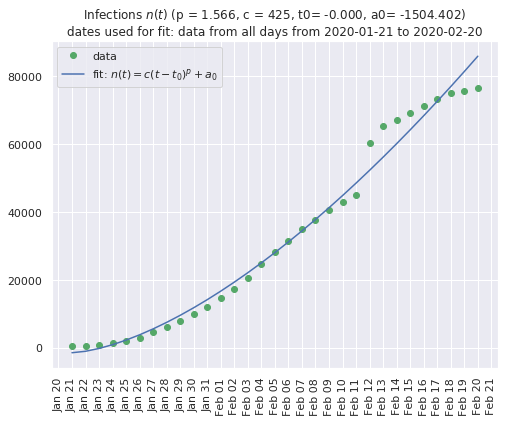

In [0]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data['date'], data['infected'], 'og')
ax.plot(data['date'], fitted_infections, '-b')
ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')}) \n"+
             f"dates used for fit: {dates_used_string}")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)

In [0]:
for future_days in range(1, 11):
    d = int(max(data['days'])) + future_days
    print(f"Deaths in {future_days:2} days: ",
          f"{int(round(model(d, c, t0, p, a0))):6}",
          f" ({day_to_date(d)})")

Deaths in  1 days:   90577  (21 Feb 2020)
Deaths in  2 days:   95271  (22 Feb 2020)
Deaths in  3 days:  100049  (23 Feb 2020)
Deaths in  4 days:  104910  (24 Feb 2020)
Deaths in  5 days:  109852  (25 Feb 2020)
Deaths in  6 days:  114874  (26 Feb 2020)
Deaths in  7 days:  119976  (27 Feb 2020)
Deaths in  8 days:  125157  (28 Feb 2020)
Deaths in  9 days:  130416  (29 Feb 2020)
Deaths in 10 days:  135751  (01 Mar 2020)


In [0]:
for future_days in range(1, 11):
    d = int(max(data['days'])) + future_days
    print(f"Infections in {future_days:2} days: ",
          f"{int(round(model(d, c, t0, p, a0))):6}",
          f" ({day_to_date(d)})")

Infections in  1 days:   90577  (21 Feb 2020)
Infections in  2 days:   95271  (22 Feb 2020)
Infections in  3 days:  100049  (23 Feb 2020)
Infections in  4 days:  104910  (24 Feb 2020)
Infections in  5 days:  109852  (25 Feb 2020)
Infections in  6 days:  114874  (26 Feb 2020)
Infections in  7 days:  119976  (27 Feb 2020)
Infections in  8 days:  125157  (28 Feb 2020)
Infections in  9 days:  130416  (29 Feb 2020)
Infections in 10 days:  135751  (01 Mar 2020)
